In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.cm as cm

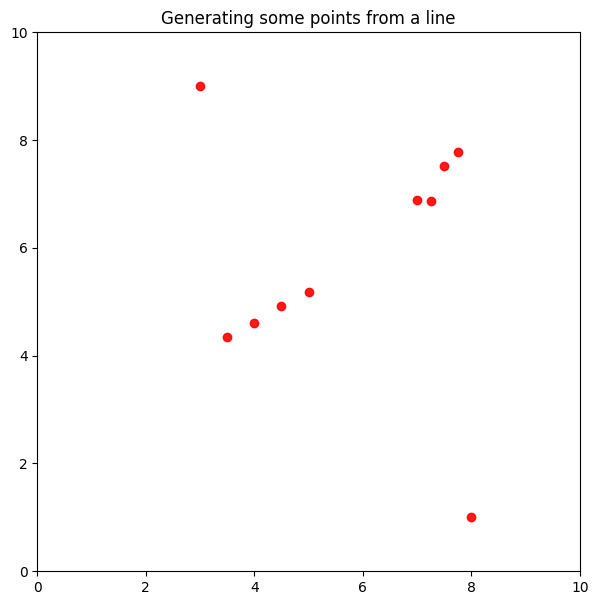

In [2]:
# Generate some data
np.random.seed(0)

m_true = .75
c_true = 1

x = np.hstack([np.linspace(3, 5, 5), np.linspace(7, 8, 5)])
y = m_true * x + c_true + np.random.rand(len(x))

# Outliers
y[9] = 1
y[0] = 9

data = np.vstack([x, y]).T
n = data.shape[0]

plt.figure(figsize=(7,7))
plt.scatter(data[:,0], data[:,1], c='red', alpha=0.9)
plt.xlim([0,10])
plt.ylim([0,10])
plt.title('Generating some points from a line');

In [3]:
x = data[:,0]
y = data[:,1]

print(f'x =\n{x.reshape(n,1)}')
print(f'y =\n{y.reshape(n,1)}')

x =
[[3.  ]
 [3.5 ]
 [4.  ]
 [4.5 ]
 [5.  ]
 [7.  ]
 [7.25]
 [7.5 ]
 [7.75]
 [8.  ]]
y =
[[9.        ]
 [4.34018937]
 [4.60276338]
 [4.91988318]
 [5.1736548 ]
 [6.89589411]
 [6.87508721]
 [7.516773  ]
 [7.77616276]
 [1.        ]]


In [4]:
theta = np.polyfit(x, y, 1)
m = theta[0]
c = theta[1]

print(f'c = {c}')
print(f'm = {m}')

c = 6.271945578021884
m = -0.08033126904046152


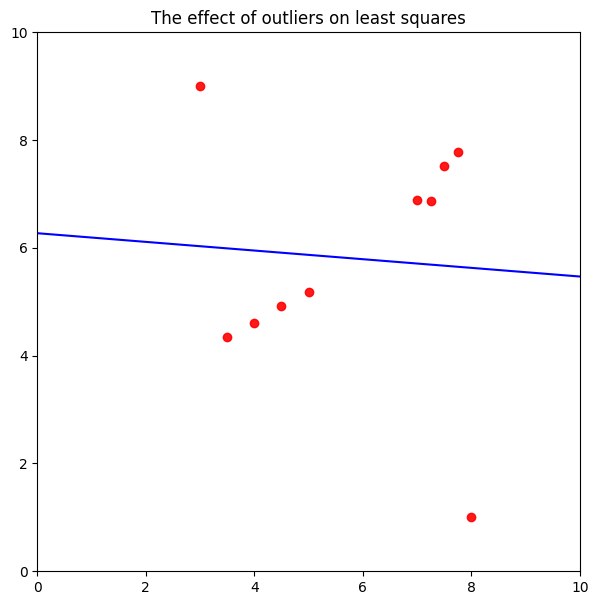

In [5]:
x_plotting = np.linspace(0,10,100)
y_plotting = m * x_plotting + c

plt.figure(figsize=(7,7))
plt.scatter(data[:,0], data[:,1], c='red', alpha=0.9)
plt.plot(x_plotting, y_plotting, 'b-')
plt.xlim([0,10])
plt.ylim([0,10])
plt.title('The effect of outliers on least squares');

In [6]:
## Outliers

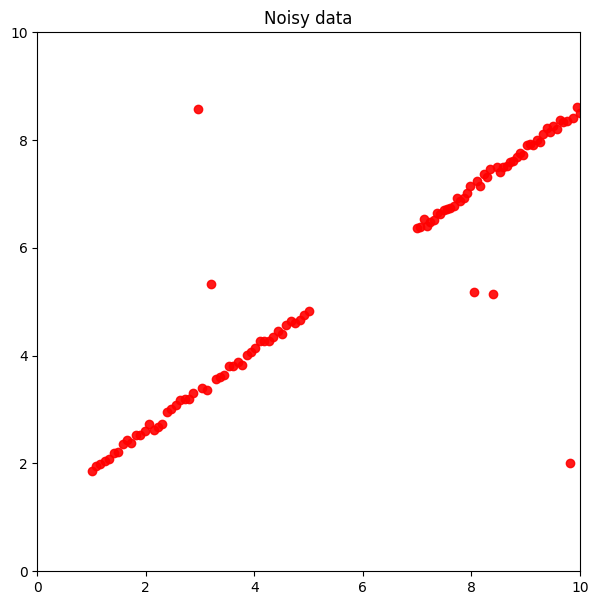

In [7]:
# Generate some data
np.random.seed(0)

m_true = .75
c_true = 1

x = np.hstack([np.linspace(1, 5, 50), np.linspace(7, 10, 50)])
y = m_true * x + c_true + np.random.rand(len(x))*.2

data = np.vstack([x, y]).T
n = data.shape[0]

outlier_percentage = 5
ind = (np.random.rand(int(n*outlier_percentage/100))*n).astype('int')
data[ind, 1] = np.random.rand(len(ind))*9
#data[ind, 1] = np.random.rand(len(ind))*10+90

plt.figure(figsize=(7,7))
plt.scatter(data[:,0], data[:,1], c='red', alpha=0.9)
plt.xlim([0,10])
plt.ylim([0,10])
#plt.ylim([0,100])
plt.title('Noisy data');

In [8]:
def draw_line(theta, ax, **kwargs):
    m = theta[0]
    c = theta[1]
    
    xmin, xmax = ax.get_xbound()
    
    ymin = m * xmin + c
    ymax = m * xmax + c
        
    l = mlines.Line2D([xmin, xmax], [ymin,ymax], **kwargs)
    ax.add_line(l)

In [9]:
theta = np.polyfit(data[:,0], data[:,1], 1)
print(f'#data = {n}')
print(f'theta = {theta}')

#data = 100
theta = [0.68027611 1.4600194 ]


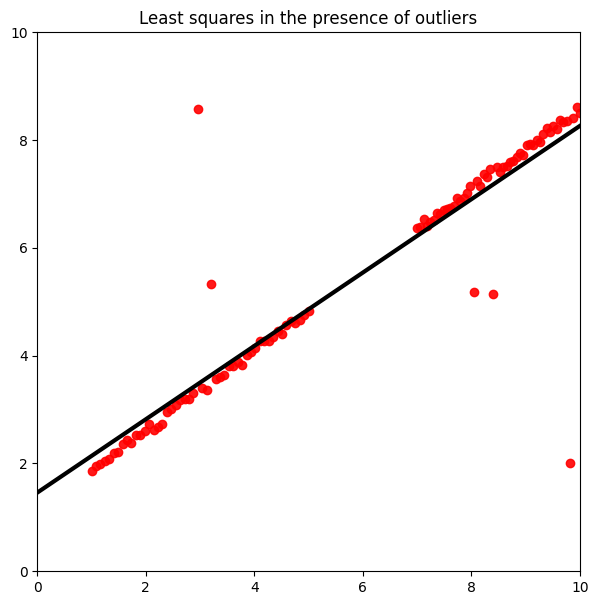

In [10]:
plt.figure(figsize=(7,7))
plt.scatter(data[:,0], data[:,1], c='red', alpha=0.9)
plt.xlim([0,10])
plt.ylim([0,10])
#plt.ylim([0,100])
plt.title('Least squares in the presence of outliers');
draw_line(theta, plt.gca(), c='black', linewidth='3')

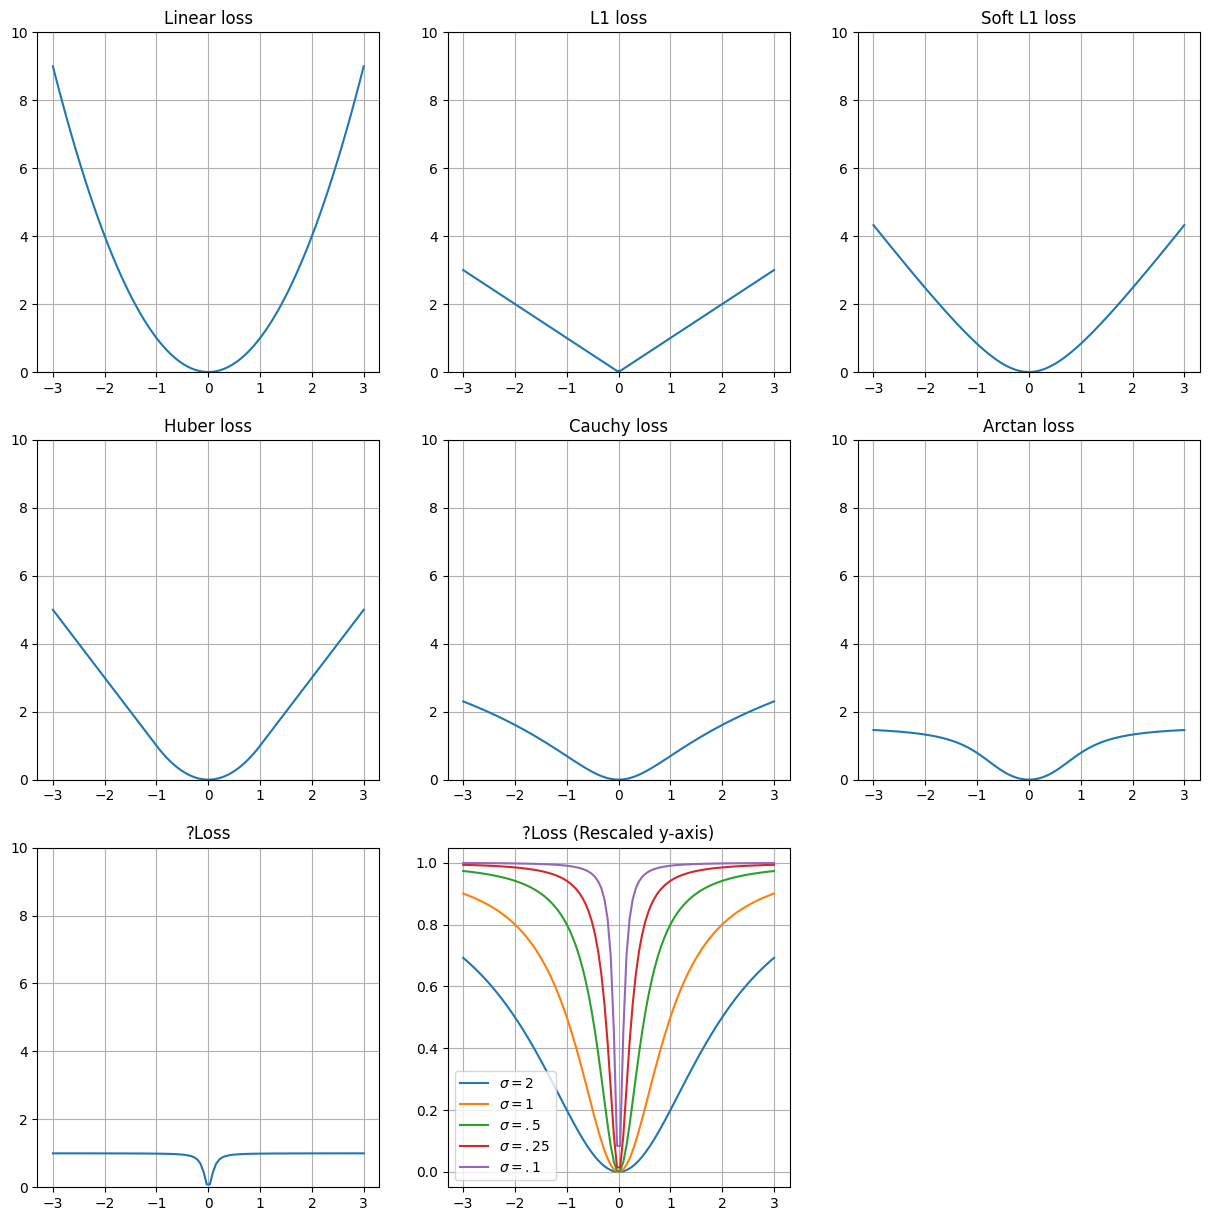

In [11]:
e = np.linspace(-3,3,100)
z = np.square(e)

linear_loss = z
l1_loss = np.abs(e)
soft_l1_loss = 2*(np.power(1+z, 0.5) - 1) # Smooth approx. of l1 loss.
huber_loss = 2*np.power(z, 0.5) - 1
huber_loss[z <= 1] = z[z <= 1]
cauchy_loss = np.log(1 + z)
arctan_loss = np.arctan(z)

scale = 0.1
robust_loss = z / (z + scale**2)

plt.figure(figsize=(15,15))
plt.subplot(331)
plt.title('Linear loss')
plt.ylim(0,10)
plt.grid()
plt.plot(e, linear_loss, label='Linear loss')
plt.subplot(332)
plt.grid()
plt.ylim(0,10)
plt.title('L1 loss')
plt.plot(e, l1_loss, label='L1 loss')
plt.subplot(333)
plt.grid()
plt.ylim(0,10)
plt.title('Soft L1 loss')
plt.plot(e, soft_l1_loss, label='Soft L1 loss')
plt.subplot(334)
plt.grid()
plt.ylim(0,10)
plt.title('Huber loss')
plt.plot(e, huber_loss, label='Huber loss')
plt.subplot(335)
plt.grid()
plt.ylim(0,10)
plt.title('Cauchy loss')
plt.plot(e, cauchy_loss, label='Cauchy loss')
plt.subplot(336)
plt.grid()
plt.ylim(0,10)
plt.title('Arctan loss')
plt.plot(e, arctan_loss, label='Arctan loss')
plt.subplot(337)
plt.grid()
plt.ylim(0,10)
plt.title('?Loss')
plt.plot(e, robust_loss, label='Robust loss')
plt.subplot(338)
plt.grid()
plt.title('?Loss (Rescaled y-axis)')
plt.plot(e, z / (z + 2**2), label='$\sigma=2$')
plt.plot(e, z / (z + 1**2), label='$\sigma=1$')
plt.plot(e, z / (z + .5**2), label='$\sigma=.5$')
plt.plot(e, z / (z + .25**2), label='$\sigma=.25$')
plt.plot(e, z / (z + .1**2), label='$\sigma=.1$')
plt.legend();

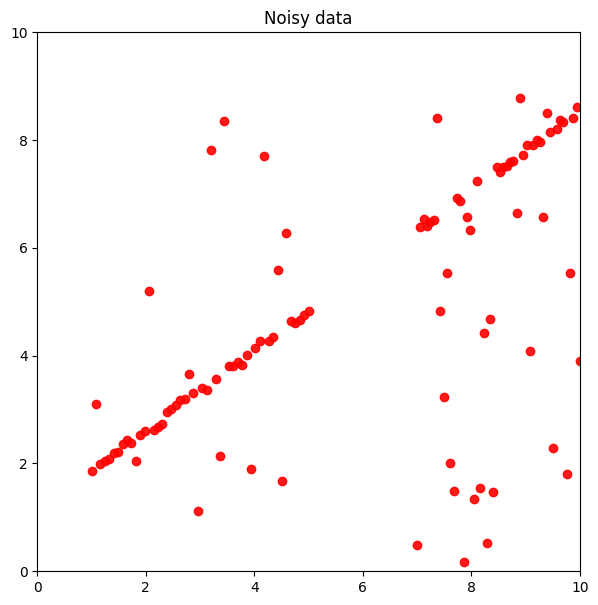

In [12]:
# Generate some data
np.random.seed(0)

m_true = .75
c_true = 1

x = np.hstack([np.linspace(1, 5, 50), np.linspace(7, 10, 50)])
y = m_true * x + c_true + np.random.rand(len(x))*.2

data = np.vstack([x, y]).T
n = data.shape[0]

outlier_percentage = 50
ind = (np.random.rand(int(n*outlier_percentage/100))*n).astype('int')
data[ind, 1] = np.random.rand(len(ind))*9

plt.figure(figsize=(7,7))
plt.scatter(data[:,0], data[:,1], c='red', alpha=0.9)
plt.xlim([0,10])
plt.ylim([0,10])
plt.title('Noisy data');

In [13]:
def line_fitting_errors(x, data):
    m = x[0]
    c = x[1]
    y_predicted = m * data[:,0] + c
    e = y_predicted - data[:,1]
    return e

In [14]:
theta_guess = [1, 1] # Need an intial guess

# Available losses
losses = [
    'linear',
    'soft_l1',
    'huber',
    'cauchy',
    'arctan'
]
loss_id = 4  # Pick a loss

In [15]:
# Non-linear least square fitting
from scipy.optimize import least_squares
retval = least_squares(line_fitting_errors, theta_guess, loss=losses[loss_id], args=[data])
print(f'Reasons for stopping: {retval["message"]}')
print(f'Success: {retval["success"]}')
theta = retval['x']
print(f'#data = {n}')
print(f'theta = {theta}')

Reasons for stopping: `ftol` termination condition is satisfied.
Success: True
#data = 100
theta = [0.73475407 1.15731305]


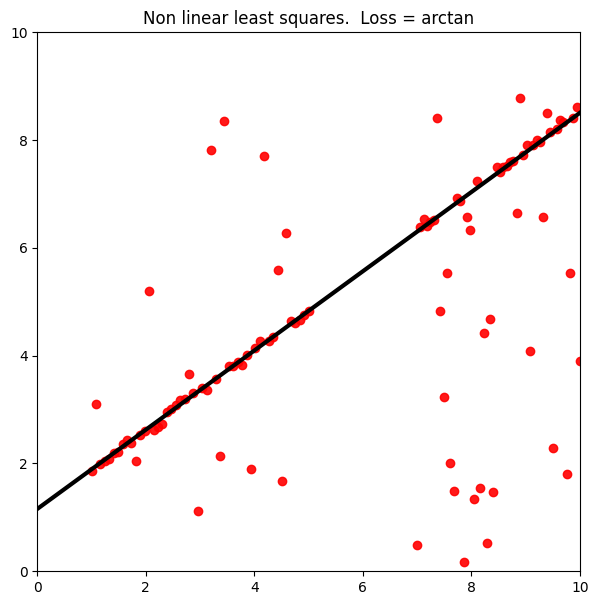

In [16]:
plt.figure(figsize=(7,7))
ax = plt.gca()
plt.scatter(data[:,0], data[:,1], c='red', alpha=0.9)
plt.xlim([0,10])
plt.ylim([0,10])
plt.title(f'Non linear least squares.  Loss = {losses[loss_id]}')
draw_line(theta, ax, c='black', linewidth='3');

In [17]:
# Incomplete data

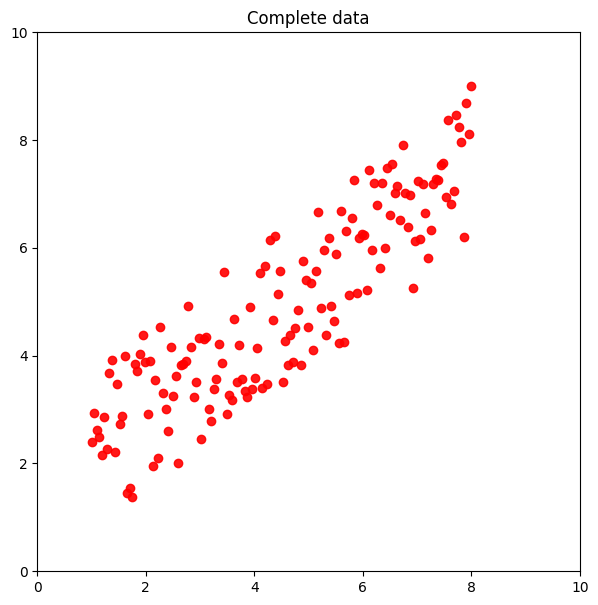

In [18]:
# Generate some data
np.random.seed(0)

m_true = .75
c_true = 0
x = np.linspace(1, 8, 150)
y = m_true * x + c_true + np.random.rand(len(x))*3

data = np.vstack([x, y]).T
n = data.shape[0]

plt.figure(figsize=(7,7))
plt.scatter(x, y, c='red', alpha=0.9)
plt.xlim([0,10])
plt.ylim([0,10])
plt.title('Complete data');

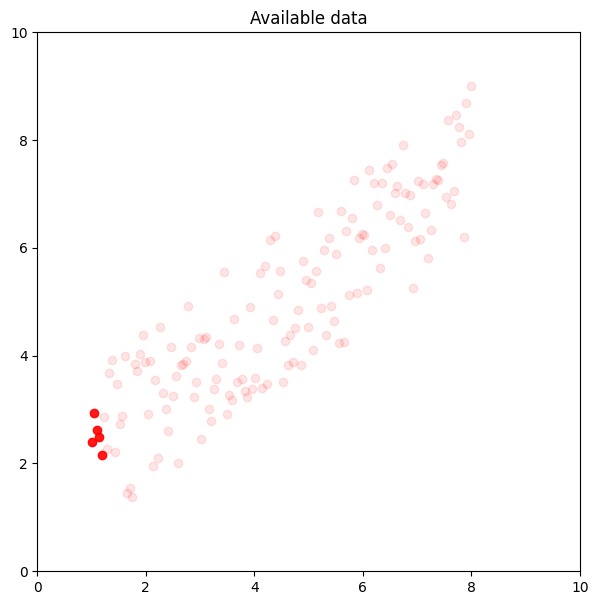

In [19]:
cutoff = 5 
x_available = x[:cutoff]
y_available = y[:cutoff]

data = np.vstack([x_available, y_available]).T
n = data.shape[0]

plt.figure(figsize=(7,7))
plt.scatter(data[:,0], data[:,1], c='red', alpha=0.9)
plt.scatter(x[cutoff:], y[cutoff:], c='red', alpha=0.1)
plt.xlim([0,10])
plt.ylim([0,10])
plt.title('Available data');

In [20]:
theta = np.polyfit(data[:,0], data[:,1], 1)
print(f'#available data = {n}')
print(f'theta = {theta}')

#available data = 5
theta = [-1.93598208  4.63953878]


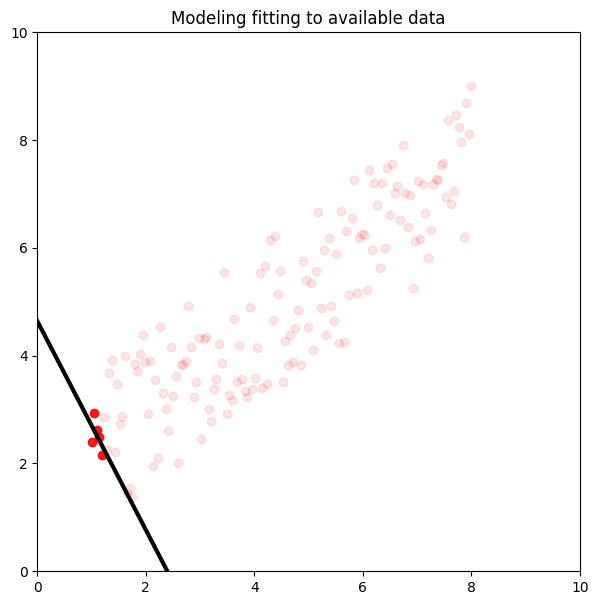

In [21]:
plt.figure(figsize=(7,7))
plt.scatter(data[:,0], data[:,1], c='red', alpha=0.9)
plt.scatter(x[cutoff:], y[cutoff:], c='red', alpha=0.1)
plt.xlim([0,10])
plt.ylim([0,10])
plt.title('Modeling fitting to available data');
draw_line(theta, plt.gca(), c='black', linewidth='3')

In [22]:
# Mixed data

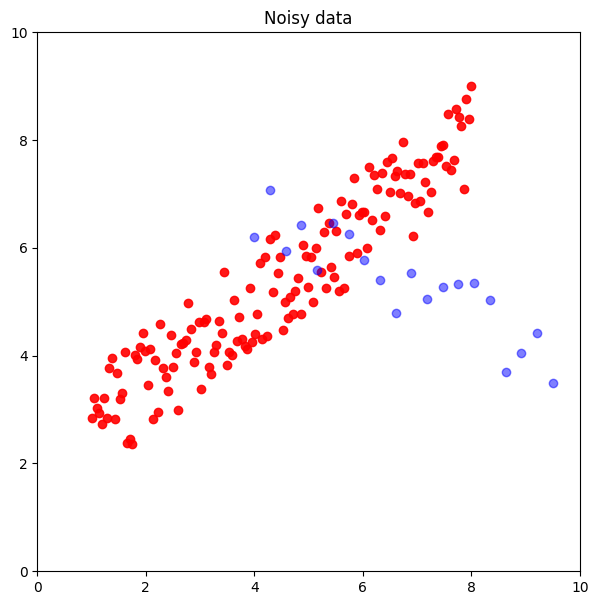

In [23]:
# Generate some data
np.random.seed(0)

m_true_1 = .75
c_true_1 = 1
x1 = np.linspace(1, 8, 150)
y1 = m_true_1 * x1 + c_true_1 + np.random.rand(len(x1))*2

m_true_2 = -.5
c_true_2 = 8
x2 = np.linspace(4, 9.5, 20)
y2 = m_true_2 * x2 + c_true_2 + np.random.rand(len(x2))*1.4

x = np.hstack([x1, x2])
y = np.hstack([y1, y2])

data = np.vstack([x, y]).T
n = data.shape[0]

plt.figure(figsize=(7,7))
plt.scatter(x1, y1, c='red', alpha=0.9)
plt.scatter(x2, y2, c='blue', alpha=0.5)
plt.xlim([0,10])
plt.ylim([0,10])
plt.title('Noisy data');

In [24]:
theta = np.polyfit(data[:,0], data[:,1], 1)
print(f'#data = {n}')
print(f'theta = {theta}')

#data = 170
theta = [0.58011192 2.62702126]


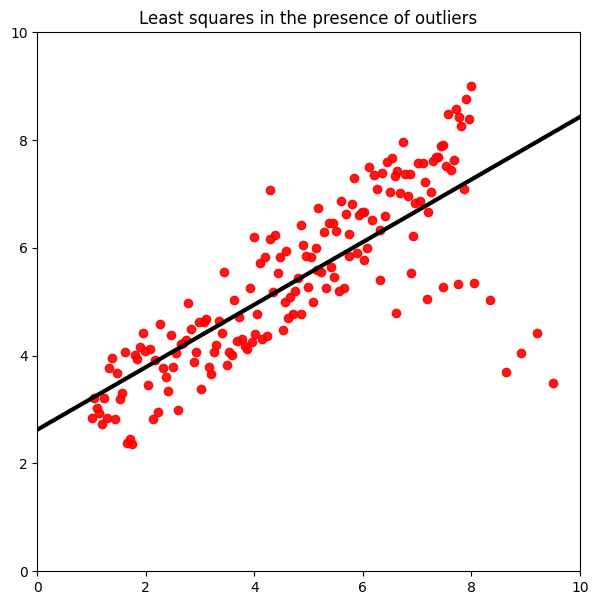

In [25]:
plt.figure(figsize=(7,7))
ax = plt.gca()
plt.scatter(data[:,0], data[:,1], c='red', alpha=0.9)
plt.xlim([0,10])
plt.ylim([0,10])
plt.title('Least squares in the presence of outliers');
draw_line(theta, ax, c='black', linewidth='3')